In [1]:
import pandas as pd
from sklearn.model_selection import KFold
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
import warnings
from tqdm.auto import tqdm

c:\Users\dayth\anaconda3\envs\tesisNN\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df2 = pd.read_csv("../../data/processed/data_final.csv", encoding="utf-8", delimiter=",")
df2.head()

,precio,banos,dormitorios,superficie_total,superficie_construida,estacionamiento,latitud,longitud,comuna,población 2024,...,pct_cocina_moderna,pct_propia_total,pct_arrendada,ingreso_promedio,ingreso_mediana,indice_calidad_materiales,indice_servicios_basicos,indice_calidad_vivienda_general,distancia_hospital,distancia_metro
0,322633576.0,3.0,5.0,404.0,275.0,1.0,-33.345468,-70.678398,huechuraba,101808.0,...,89.86,64.31,0.00,720051.66,402500.0,86.47,61.35,74.64,8064.787023,2554.229150
1,157180460.0,2.0,3.0,190.0,127.0,1.0,-33.563025,-70.559425,puente alto,568086.0,...,90.62,69.71,0.18,538232.86,400000.0,93.75,65.79,78.18,845.094730,2324.734493
2,133544301.0,2.0,5.0,146.0,61.0,1.0,-33.641678,-70.689872,san bernardo,306371.0,...,90.21,58.31,1.16,488733.18,400000.0,89.94,62.44,76.41,5475.616211,11151.846959
3,117786861.0,2.0,3.0,145.0,82.0,1.0,-33.613778,-70.887450,peñaflor,94402.0,...,89.12,65.85,0.19,591753.35,400000.0,84.18,62.29,77.28,1600.028166,16662.321199
4,153241100.0,4.0,4.0,172.0,82.0,1.0,-33.360659,-70.709209,quilicura,205624.0,...,93.53,61.08,0.38,549642.87,450000.0,94.77,67.11,74.76,7622.326772,1948.472205


In [3]:
df = pd.read_csv("../../data/processed/dataset_variables_finales.csv", encoding="utf-8", delimiter=",")
df.head()

,precio,matrícula particular pagado 2024,superficie_total,simce 4to básico lectura 2022,banos,superficie_construida,longitud,latitud,distancia_metro,simce 4to básico matemáticas 2022,...,dormitorios,ingreso_promedio,pobreza por ingresos 2022 (%),matrícula subvencionada 2024,trabajadores_información_comunicaciones_2023,trabajadores_otras_actividades_2023,empresas_otras_actividades_2023,empresas_financieras_seguros_2023,indice_calidad_materiales,pobreza multidimensional 2022 (%)
0,322633576.0,6810.0,404.0,285.0,3.0,275.0,-70.678398,-33.345468,2554.229150,274.0,...,5.0,720051.66,4.3,4724.0,16518.0,3679.0,487.0,672.0,86.47,18.6
1,157180460.0,4221.0,190.0,279.0,2.0,127.0,-70.559425,-33.563025,2324.734493,268.0,...,3.0,538232.86,5.0,84429.0,658.0,2299.0,1922.0,723.0,93.75,18.9
2,133544301.0,3215.0,146.0,273.0,2.0,61.0,-70.689872,-33.641678,11151.846959,258.0,...,5.0,488733.18,6.0,38599.0,498.0,1233.0,843.0,262.0,89.94,18.7
3,117786861.0,769.0,145.0,273.0,2.0,82.0,-70.887450,-33.613778,16662.321199,256.0,...,3.0,591753.35,7.3,12798.0,93.0,118.0,299.0,61.0,84.18,15.1
4,153241100.0,2732.0,172.0,283.0,4.0,82.0,-70.709209,-33.360659,1948.472205,269.0,...,4.0,549642.87,5.2,33726.0,861.0,811.0,660.0,304.0,94.77,17.0


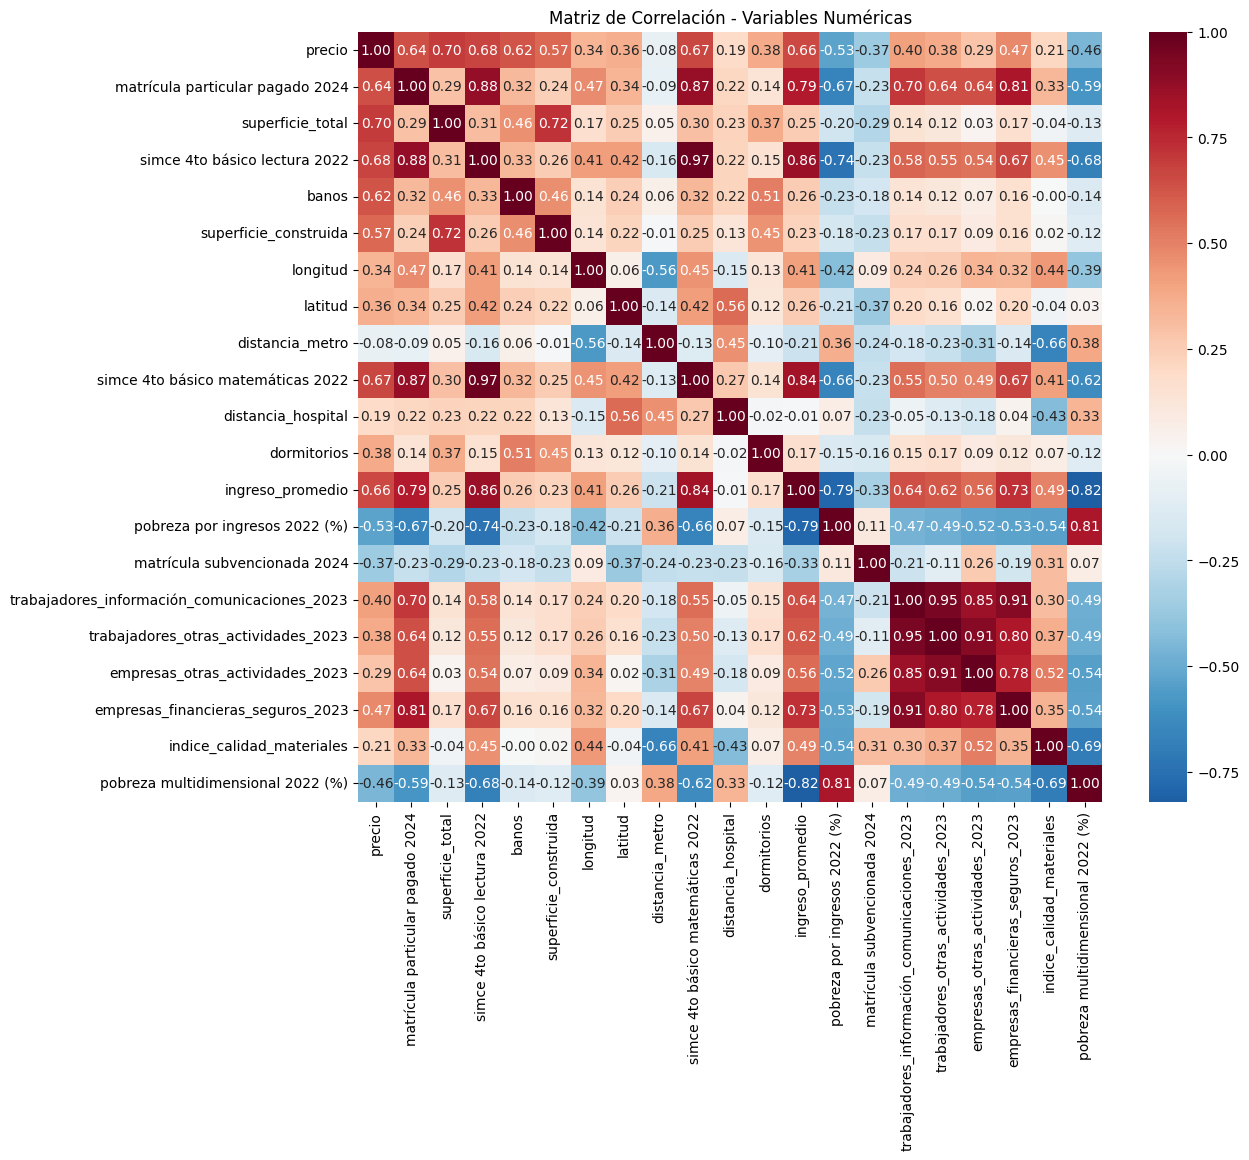

In [4]:
numeric_df = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, 
            annot=True, 
            cmap='RdBu_r', 
            center=0,
            fmt='.2f')
plt.title('Matriz de Correlación - Variables Numéricas')
plt.show()

In [5]:
df.columns

Index(['precio', 'matrícula particular pagado 2024', 'superficie_total',
       'simce 4to básico lectura 2022', 'banos', 'superficie_construida',
       'longitud', 'latitud', 'distancia_metro',
       'simce 4to básico matemáticas 2022', 'distancia_hospital',
       'dormitorios', 'ingreso_promedio', 'pobreza por ingresos 2022 (%)',
       'matrícula subvencionada 2024',
       'trabajadores_información_comunicaciones_2023',
       'trabajadores_otras_actividades_2023',
       'empresas_otras_actividades_2023', 'empresas_financieras_seguros_2023',
       'indice_calidad_materiales', 'pobreza multidimensional 2022 (%)'],
      dtype='object')

In [6]:
variables_a_eliminar = [
    'matrícula particular pagado 2024',
    'ingreso_promedio',
    'simce 4to básico matemáticas 2022',
    'pobreza por ingresos 2022 (%)',
    'trabajadores_información_comunicaciones_2023',
    'empresas_otras_actividades_2023',
    'trabajadores_otras_actividades_2023',
    'pobreza multidimensional 2022 (%)'
]

df3 = df.drop(variables_a_eliminar, axis=1)
df3.head()

,precio,superficie_total,simce 4to básico lectura 2022,banos,superficie_construida,longitud,latitud,distancia_metro,distancia_hospital,dormitorios,matrícula subvencionada 2024,empresas_financieras_seguros_2023,indice_calidad_materiales
0,322633576.0,404.0,285.0,3.0,275.0,-70.678398,-33.345468,2554.229150,8064.787023,5.0,4724.0,672.0,86.47
1,157180460.0,190.0,279.0,2.0,127.0,-70.559425,-33.563025,2324.734493,845.094730,3.0,84429.0,723.0,93.75
2,133544301.0,146.0,273.0,2.0,61.0,-70.689872,-33.641678,11151.846959,5475.616211,5.0,38599.0,262.0,89.94
3,117786861.0,145.0,273.0,2.0,82.0,-70.887450,-33.613778,16662.321199,1600.028166,3.0,12798.0,61.0,84.18
4,153241100.0,172.0,283.0,4.0,82.0,-70.709209,-33.360659,1948.472205,7622.326772,4.0,33726.0,304.0,94.77


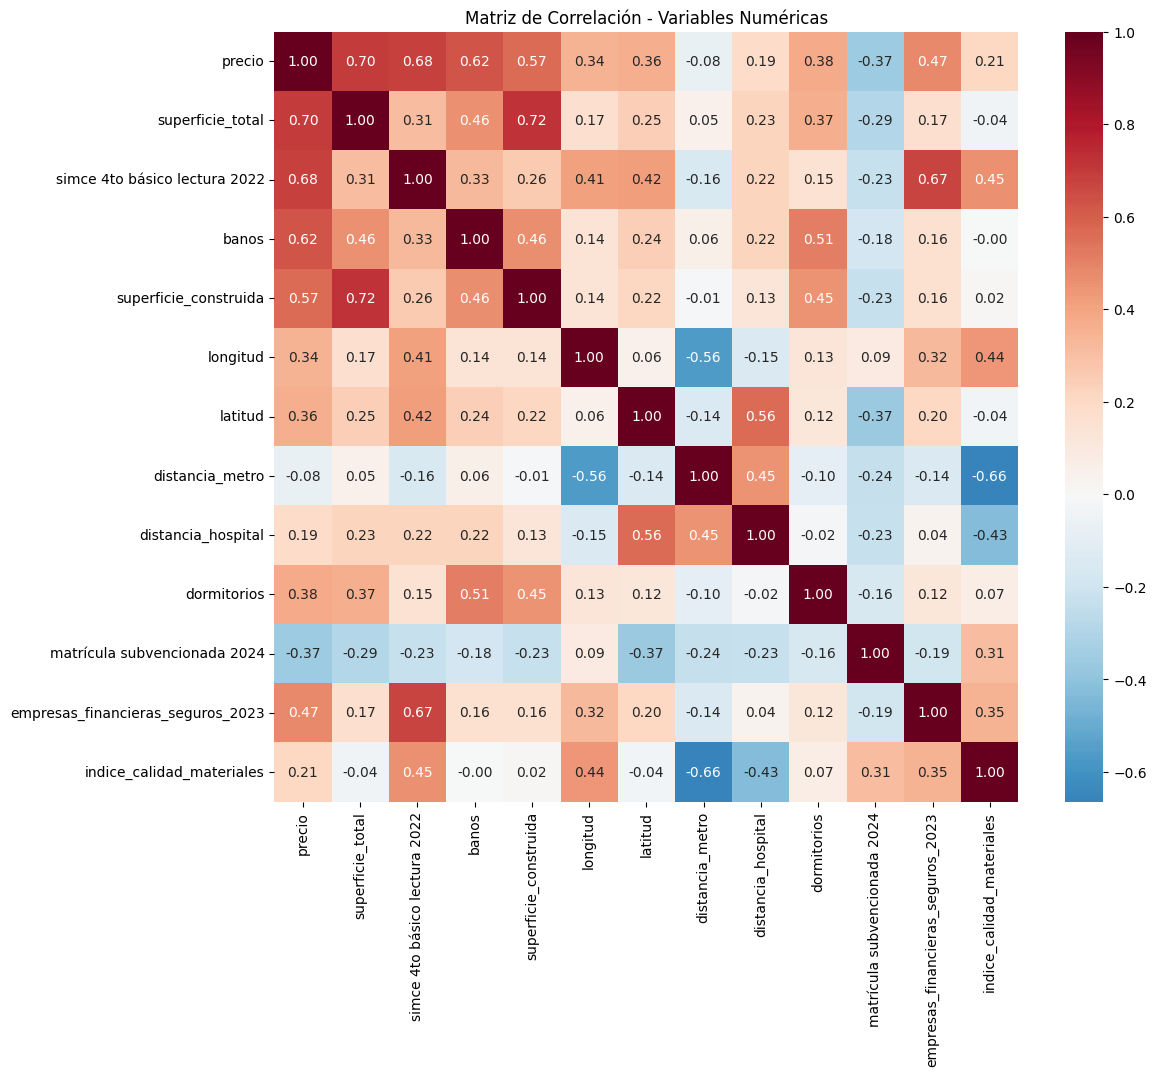

In [7]:
numeric_df = df3.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, 
            annot=True, 
            cmap='RdBu_r', 
            center=0,
            fmt='.2f')
plt.title('Matriz de Correlación - Variables Numéricas')
plt.show()

In [8]:
df.columns

Index(['precio', 'matrícula particular pagado 2024', 'superficie_total',
       'simce 4to básico lectura 2022', 'banos', 'superficie_construida',
       'longitud', 'latitud', 'distancia_metro',
       'simce 4to básico matemáticas 2022', 'distancia_hospital',
       'dormitorios', 'ingreso_promedio', 'pobreza por ingresos 2022 (%)',
       'matrícula subvencionada 2024',
       'trabajadores_información_comunicaciones_2023',
       'trabajadores_otras_actividades_2023',
       'empresas_otras_actividades_2023', 'empresas_financieras_seguros_2023',
       'indice_calidad_materiales', 'pobreza multidimensional 2022 (%)'],
      dtype='object')

In [9]:
# ============================================================
# CELDA 2: MLPPipeline con K-Fold Cross-Validation
# ============================================================
from sklearn.model_selection import KFold
import numpy as np

class MLPPipelineCV:
    def __init__(self, X, y, n_splits=5, random_state=42):
        """Pipeline con K-Fold Cross-Validation"""
        self.X = X
        self.y = y
        self.n_splits = n_splits
        self.random_state = random_state
        self.cv_results = []
        
    def _calculate_metrics(self, y_true, y_pred):
        """Calcular métricas"""
        mse = mean_squared_error(y_true, y_pred)
        mae = mean_absolute_error(y_true, y_pred)
        r2 = r2_score(y_true, y_pred)
        mask = y_true != 0
        mape = np.mean(np.abs((y_true[mask] - y_pred[mask]) / y_true[mask])) * 100
        mae_pct = (mae / np.mean(y_true)) * 100
        
        return {
            'rmse': np.sqrt(mse),
            'mae': mae,
            'mape': mape,
            'mae_pct': mae_pct,
            'r2': r2
        }
    
    def _build_model(self, n_features, architecture):
        """Construir modelo según arquitectura"""
        if architecture == 'default':
            layers = [128, 64, 32]
            dropouts = [0.3, 0.2, 0.1]
        elif architecture == 'deep':
            layers = [256, 128, 64, 32]
            dropouts = [0.4, 0.3, 0.2, 0.1]
        elif architecture == 'wide':
            layers = [256, 128]
            dropouts = [0.3, 0.2]
        elif isinstance(architecture, list):
            layers = architecture
            dropouts = [0.3] * len(layers)
        
        modules = []
        in_features = n_features
        
        for out_features, dropout in zip(layers, dropouts):
            modules.extend([
                nn.Linear(in_features, out_features),
                nn.BatchNorm1d(out_features),
                nn.ReLU(),
                nn.Dropout(dropout)
            ])
            in_features = out_features
        
        modules.append(nn.Linear(in_features, 1))
        return nn.Sequential(*modules)
    
    def _train_fold(self, X_train, y_train, X_val, y_val, architecture, 
                    epochs, batch_size, lr, weight_decay):
        """Entrenar un fold"""
        # Normalización
        scaler_X = StandardScaler()
        scaler_y = StandardScaler()
        
        X_train_scaled = scaler_X.fit_transform(X_train)
        X_val_scaled = scaler_X.transform(X_val)
        
        y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1)).flatten()
        y_val_scaled = scaler_y.transform(y_val.reshape(-1, 1)).flatten()
        
        # Convertir a tensores
        X_train_t = torch.FloatTensor(X_train_scaled)
        X_val_t = torch.FloatTensor(X_val_scaled)
        y_train_t = torch.FloatTensor(y_train_scaled)
        y_val_t = torch.FloatTensor(y_val_scaled)
        
        # Modelo
        model = self._build_model(X_train.shape[1], architecture)
        criterion = nn.MSELoss()
        optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)
        scheduler = optim.lr_scheduler.ReduceLROnPlateau(
            optimizer, mode='min', factor=0.5, patience=10
        )
        
        # Dataset y DataLoader
        train_dataset = TensorDataset(X_train_t, y_train_t)
        train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
        
        # Entrenar
        for epoch in range(epochs):
            model.train()
            for batch_x, batch_y in train_loader:
                optimizer.zero_grad()
                outputs = model(batch_x).squeeze()
                loss = criterion(outputs, batch_y)
                loss.backward()
                optimizer.step()
            
            # Validación
            model.eval()
            with torch.no_grad():
                val_outputs = model(X_val_t).squeeze()
                val_loss = criterion(val_outputs, y_val_t).item()
            
            scheduler.step(val_loss)
        
        # Predicciones finales
        model.eval()
        with torch.no_grad():
            val_pred_scaled = model(X_val_t).squeeze().numpy()
        
        val_pred = scaler_y.inverse_transform(val_pred_scaled.reshape(-1, 1)).flatten()
        
        return self._calculate_metrics(y_val, val_pred)
    
    def run_cv(self, architecture='default', epochs=100, batch_size=32, 
               lr=0.001, weight_decay=1e-4, verbose=True):
        """Ejecutar K-Fold Cross-Validation"""
        kfold = KFold(n_splits=self.n_splits, shuffle=True, random_state=self.random_state)
        
        self.cv_results = []
        
        if verbose:
            print(f"\n{'='*70}")
            print(f"🔄 Iniciando {self.n_splits}-Fold Cross-Validation")
            print(f"   Variables: {self.X.shape[1]}, Samples: {self.X.shape[0]}")
            print(f"   Arquitectura: {architecture}")
            print(f"{'='*70}\n")
        
        for fold, (train_idx, val_idx) in enumerate(kfold.split(self.X), 1):
            if verbose:
                print(f"Fold {fold}/{self.n_splits}...", end=' ')
            
            X_train = self.X.iloc[train_idx].values
            X_val = self.X.iloc[val_idx].values
            y_train = self.y.iloc[train_idx].values
            y_val = self.y.iloc[val_idx].values
            
            fold_metrics = self._train_fold(
                X_train, y_train, X_val, y_val,
                architecture, epochs, batch_size, lr, weight_decay
            )
            
            self.cv_results.append(fold_metrics)
            
            if verbose:
                print(f"R² = {fold_metrics['r2']:.4f}, MAE = ${fold_metrics['mae']:,.0f}")
        
        # Calcular estadísticas
        self.summary = self._compute_summary()
        
        if verbose:
            self._print_summary()
        
        return self.summary
    
    def _compute_summary(self):
        """Calcular estadísticas de CV"""
        metrics = ['rmse', 'mae', 'mape', 'mae_pct', 'r2']
        summary = {}
        
        for metric in metrics:
            values = [fold[metric] for fold in self.cv_results]
            summary[metric] = {
                'mean': np.mean(values),
                'std': np.std(values),
                'min': np.min(values),
                'max': np.max(values),
                'values': values
            }
        
        return summary
    
    def _print_summary(self):
        """Imprimir resumen de CV"""
        print(f"\n{'='*70}")
        print(f"📊 RESULTADOS CROSS-VALIDATION ({self.n_splits} folds)")
        print(f"{'='*70}")
        
        print(f"\n{'Métrica':<12} {'Media':<15} {'Std':<12} {'Min':<15} {'Max':<15}")
        print("-" * 70)
        
        s = self.summary
        print(f"{'RMSE':<12} ${s['rmse']['mean']:>13,.0f} ±{s['rmse']['std']:>9,.0f} "
              f"${s['rmse']['min']:>13,.0f} ${s['rmse']['max']:>13,.0f}")
        
        print(f"{'MAE':<12} ${s['mae']['mean']:>13,.0f} ±{s['mae']['std']:>9,.0f} "
              f"${s['mae']['min']:>13,.0f} ${s['mae']['max']:>13,.0f}")
        
        print(f"{'MAPE':<12} {s['mape']['mean']:>12.2f}% ±{s['mape']['std']:>8.2f}% "
              f"{s['mape']['min']:>12.2f}% {s['mape']['max']:>12.2f}%")
        
        print(f"{'MAE_PCT':<12} {s['mae_pct']['mean']:>12.2f}% ±{s['mae_pct']['std']:>8.2f}% "
              f"{s['mae_pct']['min']:>12.2f}% {s['mae_pct']['max']:>12.2f}%")
        
        print(f"{'R²':<12} {s['r2']['mean']:>14.4f} ±{s['r2']['std']:>10.4f} "
              f"{s['r2']['min']:>14.4f} {s['r2']['max']:>14.4f}")
        
        print("="*70)

print(f"✓ Pipeline con CV listo - PyTorch {torch.__version__}")

✓ Pipeline con CV listo - PyTorch 2.5.1+cu121


In [10]:
# ============================================================
# CELDA 3: Experimento 1 - 20 variables con CV
# ============================================================
X_20 = df.drop(columns=['precio'])
y_20 = df['precio']

pipeline_20_cv = MLPPipelineCV(X_20, y_20, n_splits=5)
results_20_cv = pipeline_20_cv.run_cv(
    architecture='default',
    epochs=100,
    batch_size=32,
    lr=0.001
)


🔄 Iniciando 5-Fold Cross-Validation
   Variables: 20, Samples: 4525
   Arquitectura: default

Fold 1/5... R² = 0.7636, MAE = $45,142,804
Fold 2/5... R² = 0.8591, MAE = $41,448,180
Fold 3/5... R² = 0.8790, MAE = $40,646,846
Fold 4/5... R² = 0.8665, MAE = $41,586,072
Fold 5/5... R² = 0.8599, MAE = $44,382,152

📊 RESULTADOS CROSS-VALIDATION (5 folds)

Métrica      Media           Std          Min             Max            
----------------------------------------------------------------------
RMSE         $   65,506,083 ±4,742,690 $   60,890,361 $   74,653,889
MAE          $   42,641,211 ±1,777,806 $   40,646,846 $   45,142,804
MAPE                22.05% ±    1.43%        20.72%        24.81%
MAE_PCT             18.82% ±    1.11%        17.67%        20.57%
R²                   0.8456 ±    0.0416         0.7636         0.8790


In [11]:
# ============================================================
# CELDA 4: Experimento 2 - Variables sin correlación con CV
# ============================================================
X_uncorr = df3.drop(columns=['precio'])
y_uncorr = df3['precio']

print(f"Variables sin correlación: {X_uncorr.shape[1]}")

pipeline_uncorr_cv = MLPPipelineCV(X_uncorr, y_uncorr, n_splits=5)
results_uncorr_cv = pipeline_uncorr_cv.run_cv(
    architecture='default',
    epochs=100,
    batch_size=32,
    lr=0.001
)

Variables sin correlación: 12

🔄 Iniciando 5-Fold Cross-Validation
   Variables: 12, Samples: 4525
   Arquitectura: default

Fold 1/5... R² = 0.7880, MAE = $43,409,493
Fold 2/5... R² = 0.8652, MAE = $41,633,404
Fold 3/5... R² = 0.8723, MAE = $40,813,484
Fold 4/5... R² = 0.8594, MAE = $46,060,762
Fold 5/5... R² = 0.8637, MAE = $43,406,317

📊 RESULTADOS CROSS-VALIDATION (5 folds)

Métrica      Media           Std          Min             Max            
----------------------------------------------------------------------
RMSE         $   64,926,566 ±3,233,050 $   62,395,691 $   70,694,397
MAE          $   43,064,692 ±1,807,128 $   40,813,484 $   46,060,762
MAPE                23.10% ±    1.53%        20.92%        25.66%
MAE_PCT             18.99% ±    0.78%        17.75%        19.78%
R²                   0.8498 ±    0.0311         0.7880         0.8723


In [12]:
# ============================================================
# CELDA 5: Experimento 3 - 160 variables con CV
# ============================================================
X_160 = df2.drop(columns=['precio'])
X_160_encoded = pd.get_dummies(X_160, columns=['comuna'], drop_first=True)
y_160 = df2['precio']

# Limpiar NaNs
X_160_clean = X_160_encoded.dropna()
y_160_clean = y_160.loc[X_160_clean.index]

print(f"Variables: {X_160_clean.shape[1]}, Samples: {X_160_clean.shape[0]}")

pipeline_160_cv = MLPPipelineCV(X_160_clean, y_160_clean, n_splits=5)
results_160_cv = pipeline_160_cv.run_cv(
    architecture='deep',
    epochs=150,
    batch_size=64,
    lr=0.0001,
    weight_decay=1e-3
)

Variables: 210, Samples: 4508

🔄 Iniciando 5-Fold Cross-Validation
   Variables: 210, Samples: 4508
   Arquitectura: deep

Fold 1/5... R² = 0.8724, MAE = $39,578,473
Fold 2/5... R² = 0.8388, MAE = $42,956,213
Fold 3/5... R² = 0.8207, MAE = $44,541,351
Fold 4/5... R² = 0.8366, MAE = $46,965,829
Fold 5/5... R² = 0.8363, MAE = $44,699,430

📊 RESULTADOS CROSS-VALIDATION (5 folds)

Métrica      Media           Std          Min             Max            
----------------------------------------------------------------------
RMSE         $   67,542,107 ±5,142,684 $   57,910,081 $   72,782,517
MAE          $   43,748,259 ±2,445,442 $   39,578,473 $   46,965,829
MAPE                22.05% ±    0.87%        20.94%        22.92%
MAE_PCT             19.27% ±    0.91%        17.61%        20.21%
R²                   0.8409 ±    0.0170         0.8207         0.8724


In [13]:
# ============================================================
# CELDA 6: Comparación Final Mejorada
# ============================================================

models_data = {
    '20 Variables': results_20_cv,
    f'Sin Correlación ({X_uncorr.shape[1]} vars)': results_uncorr_cv,
    '160 Variables': results_160_cv
}

# Tabla comparativa completa
print("\n" + "="*110)
print("MÉTRICAS DE VALIDACIÓN CRUZADA")
print("="*110)

comparison_data = []
for model_name, results in models_data.items():
    comparison_data.append({
        'Modelo': model_name,
        'R² (mean)': f"{results['r2']['mean']:.4f}",
        'R² (std)': f"{results['r2']['std']:.4f}",
        'MAE (mean)': f"${results['mae']['mean']:,.0f}",
        'MAE (std)': f"${results['mae']['std']:,.0f}",
        'RMSE (mean)': f"${results['rmse']['mean']:,.0f}",
        'RMSE (std)': f"${results['rmse']['std']:,.0f}",
        'MAPE (mean)': f"{results['mape']['mean']:.2f}%",
        'MAPE (std)': f"{results['mape']['std']:.2f}%"
    })

comparison_df = pd.DataFrame(comparison_data)
print(comparison_df.to_string(index=False))

# Ranking detallado por R²
print("\n" + "="*110)
print("🏆 RANKING POR R²")
print("="*110)

# Ordenar modelos por R² medio
ranking = sorted(models_data.items(), key=lambda x: x[1]['r2']['mean'], reverse=True)

for i, (model_name, results) in enumerate(ranking, 1):
    r2_values = results['r2']['values']
    
    print(f"\n{i}. {model_name}")
    print(f"   R² medio:        {results['r2']['mean']:.4f}")
    print(f"   Desv. estándar:  {results['r2']['std']:.4f}")
    print(f"   Rango:           [{results['r2']['min']:.4f}, {results['r2']['max']:.4f}]")
    print(f"   R² por fold:     {[f'{v:.4f}' for v in r2_values]}")

# Ganador con todas las métricas
winner_name, winner_results = ranking[0]
print("\n" + "="*110)
print(f"🥇 MEJOR MODELO: {winner_name}")
print("="*110)
print(f"R²:        {winner_results['r2']['mean']:.4f} ± {winner_results['r2']['std']:.4f}")
print(f"MAE:       ${winner_results['mae']['mean']:,.0f} ± ${winner_results['mae']['std']:,.0f}")
print(f"RMSE:      ${winner_results['rmse']['mean']:,.0f} ± ${winner_results['rmse']['std']:,.0f}")
print(f"MAPE:      {winner_results['mape']['mean']:.2f}% ± {winner_results['mape']['std']:.2f}%")
print(f"MAE (%):   {winner_results['mae_pct']['mean']:.2f}% ± {winner_results['mae_pct']['std']:.2f}%")
print("="*110)

# Análisis de consistencia
print("\n" + "="*110)
print("📊 ANÁLISIS DE CONSISTENCIA (Coeficiente de Variación)")
print("="*110)

for model_name, results in sorted(models_data.items(), key=lambda x: x[1]['r2']['std']):
    cv = (results['r2']['std'] / results['r2']['mean']) * 100  # Coeficiente de variación
    consistency = "🟢 Alta" if cv < 5 else "🟡 Media" if cv < 10 else "🔴 Baja"
    print(f"{model_name:40s} CV = {cv:.2f}%  {consistency}")

print("="*110)


MÉTRICAS DE VALIDACIÓN CRUZADA
                   Modelo R² (mean) R² (std)  MAE (mean)  MAE (std) RMSE (mean) RMSE (std) MAPE (mean) MAPE (std)
             20 Variables    0.8456   0.0416 $42,641,211 $1,777,806 $65,506,083 $4,742,690      22.05%      1.43%
Sin Correlación (12 vars)    0.8498   0.0311 $43,064,692 $1,807,128 $64,926,566 $3,233,050      23.10%      1.53%
            160 Variables    0.8409   0.0170 $43,748,259 $2,445,442 $67,542,107 $5,142,684      22.05%      0.87%

🏆 RANKING POR R²

1. Sin Correlación (12 vars)
   R² medio:        0.8498
   Desv. estándar:  0.0311
   Rango:           [0.7880, 0.8723]
   R² por fold:     ['0.7880', '0.8652', '0.8723', '0.8594', '0.8637']

2. 20 Variables
   R² medio:        0.8456
   Desv. estándar:  0.0416
   Rango:           [0.7636, 0.8790]
   R² por fold:     ['0.7636', '0.8591', '0.8790', '0.8665', '0.8599']

3. 160 Variables
   R² medio:        0.8409
   Desv. estándar:  0.0170
   Rango:           [0.8207, 0.8724]
   R² por fold

In [30]:
y = df3['precio']

X = df3.drop(columns=['precio'])

y_binned = pd.qcut(y, q=10, duplicates='drop')
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y_binned
)

print(f"Tamaño conjunto entrenamiento: {X_train.shape}")
print(f"Tamaño conjunto prueba: {X_test.shape}")

Tamaño conjunto entrenamiento: (3620, 12)
Tamaño conjunto prueba: (905, 12)


In [31]:
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).flatten()
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1)).flatten()

print("Datos normalizados:")
print(f"X_train shape: {X_train_scaled.shape}")
print(f"X_test shape: {X_test_scaled.shape}")
print(f"y_train range: [{y_train_scaled.min():.3f}, {y_train_scaled.max():.3f}]")
print(f"y_test range: [{y_test_scaled.min():.3f}, {y_test_scaled.max():.3f}]")

Datos normalizados:
X_train shape: (3620, 12)
X_test shape: (905, 12)
y_train range: [-1.136, 3.989]
y_test range: [-1.118, 3.985]


In [32]:
X_train_tensor = torch.FloatTensor(X_train_scaled)
X_test_tensor = torch.FloatTensor(X_test_scaled)
y_train_tensor = torch.FloatTensor(y_train_scaled)
y_test_tensor = torch.FloatTensor(y_test_scaled)

print("Tensores creados:")
print(f"X_train_tensor shape: {X_train_tensor.shape}")
print(f"X_test_tensor shape: {X_test_tensor.shape}")
print(f"y_train_tensor shape: {y_train_tensor.shape}")
print(f"y_test_tensor shape: {y_test_tensor.shape}")

Tensores creados:
X_train_tensor shape: torch.Size([3620, 12])
X_test_tensor shape: torch.Size([905, 12])
y_train_tensor shape: torch.Size([3620])
y_test_tensor shape: torch.Size([905])


In [33]:
class HousePriceNN(nn.Module):
    def __init__(self, n_features):
        super(HousePriceNN, self).__init__()
        
        # Red neuronal principal
        self.network = nn.Sequential(
            # Primera capa oculta
            nn.Linear(n_features, 128),
            nn.BatchNorm1d(128),
            nn.ReLU(),
            nn.Dropout(0.3),
            
            # Segunda capa oculta
            nn.Linear(128, 64),
            nn.BatchNorm1d(64),
            nn.ReLU(),
            nn.Dropout(0.2),
            
            # Tercera capa oculta
            nn.Linear(64, 32),
            nn.BatchNorm1d(32),
            nn.ReLU(),
            nn.Dropout(0.1),
            
            # Capa de salida
            nn.Linear(32, 1)
        )
    
    def forward(self, x):
        return self.network(x)

# Crear el modelo
n_features = X_train_tensor.shape[1]
model = HousePriceNN(n_features)

print(f"Modelo creado:")
print(f"- Número de características: {n_features}")
print(f"- Número total de parámetros: {sum(p.numel() for p in model.parameters())}")
print("\nArquitectura del modelo:")
print(model)

Modelo creado:
- Número de características: 12
- Número total de parámetros: 12481

Arquitectura del modelo:
HousePriceNN(
  (network): Sequential(
    (0): Linear(in_features=12, out_features=128, bias=True)
    (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Dropout(p=0.3, inplace=False)
    (4): Linear(in_features=128, out_features=64, bias=True)
    (5): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
    (7): Dropout(p=0.2, inplace=False)
    (8): Linear(in_features=64, out_features=32, bias=True)
    (9): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): ReLU()
    (11): Dropout(p=0.1, inplace=False)
    (12): Linear(in_features=32, out_features=1, bias=True)
  )
)


In [34]:
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-4)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=10)

batch_size = 32
train_dataset = TensorDataset(X_train_tensor, y_train_tensor) 
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

print("Configuración del entrenamiento:")
print(f"Función de pérdida: {criterion}")
print(f"Optimizador: Adam con lr=0.001")
print(f"Batch size: {batch_size}")
print(f"Número de batches por época: {len(train_loader)}")

Configuración del entrenamiento:
Función de pérdida: MSELoss()
Optimizador: Adam con lr=0.001
Batch size: 32
Número de batches por época: 114


In [35]:
def train_model(model, train_loader, criterion, optimizer, scheduler,
                X_test, y_test, num_epochs=100):
    train_losses = []
    val_losses = []
    
    for epoch in range(num_epochs):
        # Entrenamiento
        model.train()
        train_loss = 0.0
        
        for batch_x, batch_y in train_loader:
            optimizer.zero_grad()
            outputs = model(batch_x).squeeze()
            loss = criterion(outputs, batch_y)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()
        
        # Validación
        model.eval()
        with torch.no_grad():
            val_outputs = model(X_test).squeeze()
            val_loss = criterion(val_outputs, y_test).item()
        
        # Guardar pérdidas
        train_losses.append(train_loss / len(train_loader))
        val_losses.append(val_loss)
        
        # Actualizar learning rate
        scheduler.step(val_loss)
        
        # Imprimir progreso cada 10 épocas
        if (epoch + 1) % 10 == 0:
            print(f'Época [{epoch+1}/{num_epochs}], '
                  f'Train Loss: {train_losses[-1]:.4f}, '
                  f'Val Loss: {val_losses[-1]:.4f}')
    
    return train_losses, val_losses

print("Función de entrenamiento definida")

Función de entrenamiento definida


In [36]:
print("Iniciando entrenamiento...")
train_losses, val_losses = train_model(
    model, train_loader, criterion, optimizer, scheduler,
    X_test_tensor, y_test_tensor, num_epochs=100
)

print("\n¡Entrenamiento completado!")

Iniciando entrenamiento...
Época [10/100], Train Loss: 0.2284, Val Loss: 0.1572
Época [20/100], Train Loss: 0.2269, Val Loss: 0.1519
Época [30/100], Train Loss: 0.2104, Val Loss: 0.1505
Época [40/100], Train Loss: 0.2036, Val Loss: 0.1506
Época [50/100], Train Loss: 0.1822, Val Loss: 0.1621
Época [60/100], Train Loss: 0.1778, Val Loss: 0.1516
Época [70/100], Train Loss: 0.1791, Val Loss: 0.1617
Época [80/100], Train Loss: 0.1845, Val Loss: 0.1503
Época [90/100], Train Loss: 0.1843, Val Loss: 0.1473
Época [100/100], Train Loss: 0.1786, Val Loss: 0.1537

¡Entrenamiento completado!


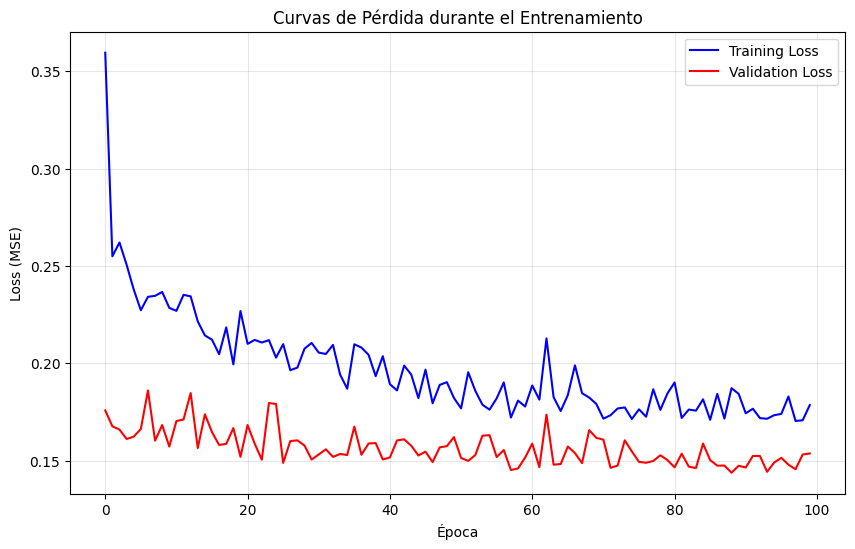

Pérdida final de entrenamiento: 0.1786
Pérdida final de validación: 0.1537


In [37]:
# Visualizar las curvas de pérdida
plt.figure(figsize=(10, 6))
plt.plot(train_losses, label='Training Loss', color='blue')
plt.plot(val_losses, label='Validation Loss', color='red')
plt.title('Curvas de Pérdida durante el Entrenamiento')
plt.xlabel('Época')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print(f"Pérdida final de entrenamiento: {train_losses[-1]:.4f}")
print(f"Pérdida final de validación: {val_losses[-1]:.4f}")

In [38]:
model.eval()
with torch.no_grad():
    # Predicciones en escala normalizada
    train_pred_scaled = model(X_train_tensor).squeeze().numpy()
    test_pred_scaled = model(X_test_tensor).squeeze().numpy()
    
    # Desnormalizar las predicciones para obtener valores reales
    train_pred = scaler_y.inverse_transform(train_pred_scaled.reshape(-1, 1)).flatten()
    test_pred = scaler_y.inverse_transform(test_pred_scaled.reshape(-1, 1)).flatten()

# Función para calcular MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    mask = y_true != 0
    return np.mean(np.abs((y_true[mask] - y_pred[mask]) / y_true[mask])) * 100

# Función para calcular MAE porcentual
def mae_percentage(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mean_true = np.mean(y_true)
    return (mae / mean_true) * 100

# Métricas en conjunto de entrenamiento
train_mse = mean_squared_error(y_train, train_pred)
train_mae = mean_absolute_error(y_train, train_pred)
train_mape = mean_absolute_percentage_error(y_train, train_pred)
train_mae_pct = mae_percentage(y_train, train_pred)
train_r2 = r2_score(y_train, train_pred)

# Métricas en conjunto de prueba
test_mse = mean_squared_error(y_test, test_pred)
test_mae = mean_absolute_error(y_test, test_pred)
test_mape = mean_absolute_percentage_error(y_test, test_pred)
test_mae_pct = mae_percentage(y_test, test_pred)
test_r2 = r2_score(y_test, test_pred)

print("=== MÉTRICAS DE EVALUACIÓN MLP ===")
print("\nConjunto de Entrenamiento:")
print(f"RMSE: ${np.sqrt(train_mse):,.0f}")
print(f"MAE: ${train_mae:,.0f}")
print(f"MAPE: {train_mape:.2f}%")
print(f"MAE Porcentual: {train_mae_pct:.2f}%")
print(f"R² Score: {train_r2:.4f}")

print("\nConjunto de Prueba:")
print(f"RMSE: ${np.sqrt(test_mse):,.0f}")
print(f"MAE: ${test_mae:,.0f}")
print(f"MAPE: {test_mape:.2f}%")
print(f"MAE Porcentual: {test_mae_pct:.2f}%")
print(f"R² Score: {test_r2:.4f}")

=== MÉTRICAS DE EVALUACIÓN MLP ===

Conjunto de Entrenamiento:
RMSE: $58,230,922
MAE: $40,119,585
MAPE: 22.36%
MAE Porcentual: 17.70%
R² Score: 0.8808

Conjunto de Prueba:
RMSE: $66,118,892
MAE: $43,691,732
MAPE: 24.67%
MAE Porcentual: 19.20%
R² Score: 0.8520


precio                                          1.000000
superficie_total                                0.695917
simce 4to básico lectura 2022                   0.677035
simce 4to básico matemáticas 2022               0.667717
ingreso_promedio                                0.655023
matrícula particular pagado 2024                0.637529
banos                                           0.623860
superficie_construida                           0.567536
empresas_financieras_seguros_2023               0.474411
trabajadores_información_comunicaciones_2023    0.404372
dormitorios                                     0.380177
trabajadores_otras_actividades_2023             0.376252
latitud                                         0.363917
longitud                                        0.343379
empresas_otras_actividades_2023                 0.285469
indice_calidad_materiales                       0.212285
distancia_hospital                              0.192036
distancia_metro                

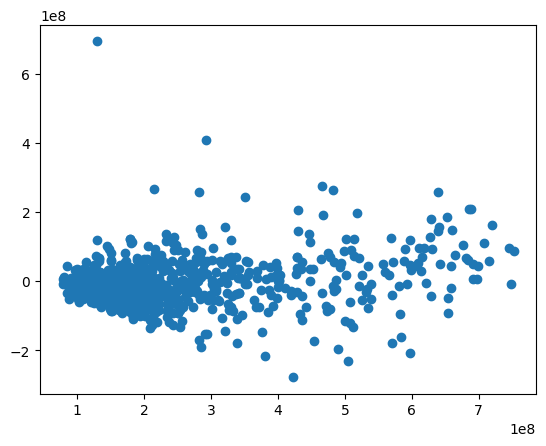

In [39]:
print(df.corr()['precio'].sort_values(ascending=False))

print("Variables con fecha 2024-2025:")
print([col for col in df.columns if '2024' in col or '2025' in col])

residuales = y_test - test_pred
plt.scatter(test_pred, residuales)

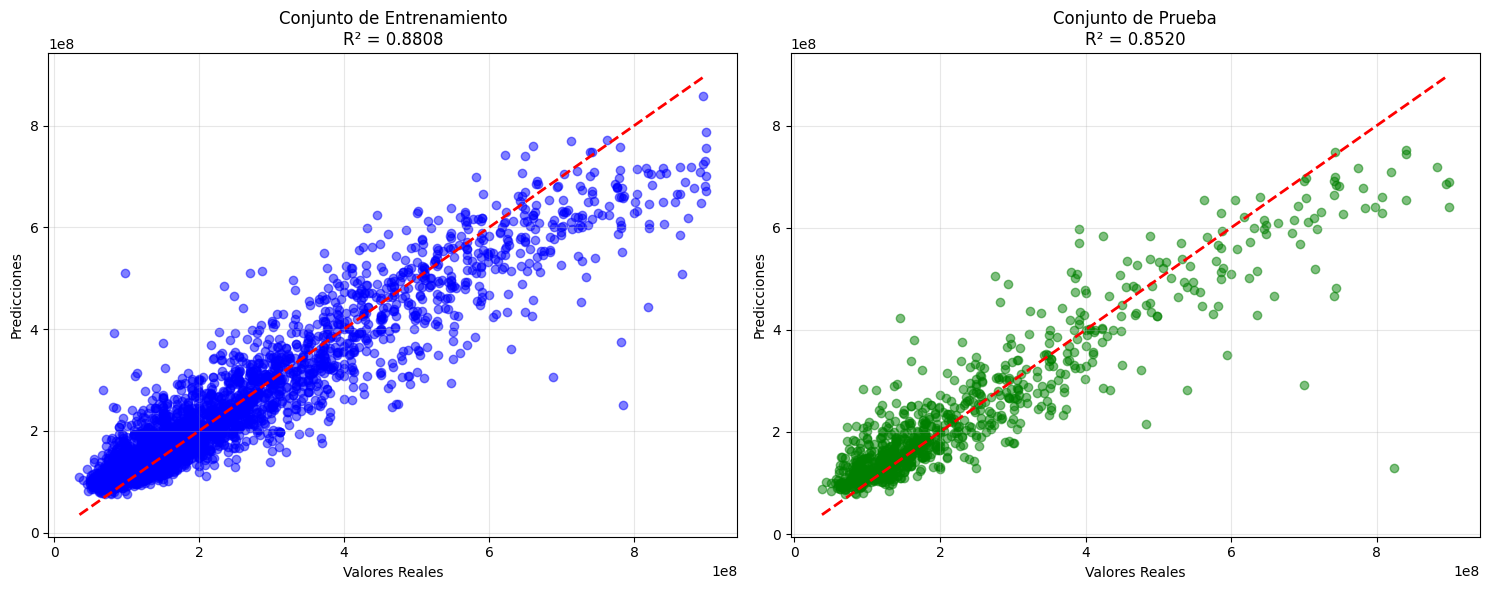

In [40]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

ax1.scatter(y_train, train_pred, alpha=0.5, color='blue')
ax1.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)
ax1.set_xlabel('Valores Reales')
ax1.set_ylabel('Predicciones')
ax1.set_title(f'Conjunto de Entrenamiento\nR² = {train_r2:.4f}')
ax1.grid(True, alpha=0.3)

ax2.scatter(y_test, test_pred, alpha=0.5, color='green')
ax2.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
ax2.set_xlabel('Valores Reales')
ax2.set_ylabel('Predicciones')
ax2.set_title(f'Conjunto de Prueba\nR² = {test_r2:.4f}')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [41]:
def train_model_single_fold(model, train_loader, criterion, optimizer, scheduler,
                           X_val, y_val, num_epochs=100):
    train_losses = []
    val_losses = []
    
    for epoch in range(num_epochs):
        model.train()
        train_loss = 0.0
        
        for batch_x, batch_y in train_loader:
            optimizer.zero_grad()
            outputs = model(batch_x).squeeze()
            loss = criterion(outputs, batch_y)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()
        
        model.eval()
        with torch.no_grad():
            val_outputs = model(X_val).squeeze()
            val_loss = criterion(val_outputs, y_val).item()

        train_losses.append(train_loss / len(train_loader))
        val_losses.append(val_loss)
        scheduler.step(val_loss)
    
    return train_losses, val_losses

def kfold_cross_validation(X_data, y_data, n_splits=5, num_epochs=100, batch_size=32):
    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    
    fold_train_losses = []
    fold_val_losses = []
    fold_metrics = []
    
    print(f"Iniciando {n_splits}-Fold Cross Validation...")
    print("="*60)
    
    for fold, (train_idx, val_idx) in enumerate(kfold.split(X_data)):
        print(f"\nFOLD {fold + 1}/{n_splits}")
        print("-" * 30)
        
        X_train_fold = X_data[train_idx]
        X_val_fold = X_data[val_idx]
        y_train_fold = y_data[train_idx]
        y_val_fold = y_data[val_idx]
        
        scaler_X_fold = StandardScaler()
        scaler_y_fold = StandardScaler()
        
        X_train_fold_scaled = scaler_X_fold.fit_transform(X_train_fold)
        X_val_fold_scaled = scaler_X_fold.transform(X_val_fold)
        
        y_train_fold_scaled = scaler_y_fold.fit_transform(y_train_fold.reshape(-1, 1)).flatten()
        y_val_fold_scaled = scaler_y_fold.transform(y_val_fold.reshape(-1, 1)).flatten()
        
        X_train_fold_tensor = torch.FloatTensor(X_train_fold_scaled)
        X_val_fold_tensor = torch.FloatTensor(X_val_fold_scaled)
        y_train_fold_tensor = torch.FloatTensor(y_train_fold_scaled)
        y_val_fold_tensor = torch.FloatTensor(y_val_fold_scaled)
        
        train_dataset_fold = TensorDataset(X_train_fold_tensor, y_train_fold_tensor)
        train_loader_fold = DataLoader(train_dataset_fold, batch_size=batch_size, shuffle=True)
        
        model_fold = HousePriceNN(X_train_fold_tensor.shape[1])
        criterion_fold = nn.MSELoss()
        optimizer_fold = optim.Adam(model_fold.parameters(), lr=0.001, weight_decay=1e-4)
        scheduler_fold = optim.lr_scheduler.ReduceLROnPlateau(optimizer_fold, mode='min', factor=0.5, patience=10)
        
        train_losses, val_losses = train_model_single_fold(
            model_fold, train_loader_fold, criterion_fold, optimizer_fold, scheduler_fold,
            X_val_fold_tensor, y_val_fold_tensor, num_epochs=num_epochs
        )
        
        model_fold.eval()
        with torch.no_grad():
            val_pred_scaled = model_fold(X_val_fold_tensor).squeeze().numpy()
            val_pred = scaler_y_fold.inverse_transform(val_pred_scaled.reshape(-1, 1)).flatten()
        
        fold_mse = mean_squared_error(y_val_fold, val_pred)
        fold_mae = mean_absolute_error(y_val_fold, val_pred)
        fold_r2 = r2_score(y_val_fold, val_pred)
        fold_rmse = np.sqrt(fold_mse)
        
        fold_train_losses.append(train_losses)
        fold_val_losses.append(val_losses)
        fold_metrics.append({
            'fold': fold + 1,
            'mse': fold_mse,
            'mae': fold_mae,
            'rmse': fold_rmse,
            'r2': fold_r2,
            'final_train_loss': train_losses[-1],
            'final_val_loss': val_losses[-1]
        })
        
        print(f"Fold {fold + 1} - RMSE: ${fold_rmse:,.0f}, MAE: ${fold_mae:,.0f}, R²: {fold_r2:.4f}")
    
    avg_mse = np.mean([m['mse'] for m in fold_metrics])
    avg_mae = np.mean([m['mae'] for m in fold_metrics])
    avg_rmse = np.mean([m['rmse'] for m in fold_metrics])
    avg_r2 = np.mean([m['r2'] for m in fold_metrics])
    
    std_mse = np.std([m['mse'] for m in fold_metrics])
    std_mae = np.std([m['mae'] for m in fold_metrics])
    std_rmse = np.std([m['rmse'] for m in fold_metrics])
    std_r2 = np.std([m['r2'] for m in fold_metrics])
    
    print("\n" + "="*60)
    print("RESULTADOS FINALES K-FOLD CROSS VALIDATION")
    print("="*60)
    print(f"RMSE: ${avg_rmse:,.0f} (±${std_rmse:,.0f})")
    print(f"MAE: ${avg_mae:,.0f} (±${std_mae:,.0f})")
    print(f"R² Score: {avg_r2:.4f} (±{std_r2:.4f})")
    
    return fold_metrics, fold_train_losses, fold_val_losses

print("Preparando datos para K-Fold Cross Validation...")

X_full = X.values
y_full = y.values  

cv_results, cv_train_losses, cv_val_losses = kfold_cross_validation(
    X_full, y_full, 
    n_splits=5, 
    num_epochs=100, 
    batch_size=32
)

Preparando datos para K-Fold Cross Validation...
Iniciando 5-Fold Cross Validation...

FOLD 1/5
------------------------------
Fold 1 - RMSE: $69,683,786, MAE: $42,297,794, R²: 0.7941

FOLD 2/5
------------------------------
Fold 2 - RMSE: $62,465,756, MAE: $41,643,284, R²: 0.8649

FOLD 3/5
------------------------------
Fold 3 - RMSE: $61,189,609, MAE: $41,793,222, R²: 0.8778

FOLD 4/5
------------------------------
Fold 4 - RMSE: $67,877,479, MAE: $44,754,298, R²: 0.8527

FOLD 5/5
------------------------------
Fold 5 - RMSE: $64,251,611, MAE: $44,513,006, R²: 0.8568

RESULTADOS FINALES K-FOLD CROSS VALIDATION
RMSE: $65,093,648 (±$3,214,823)
MAE: $43,000,321 (±$1,353,280)
R² Score: 0.8493 (±0.0289)


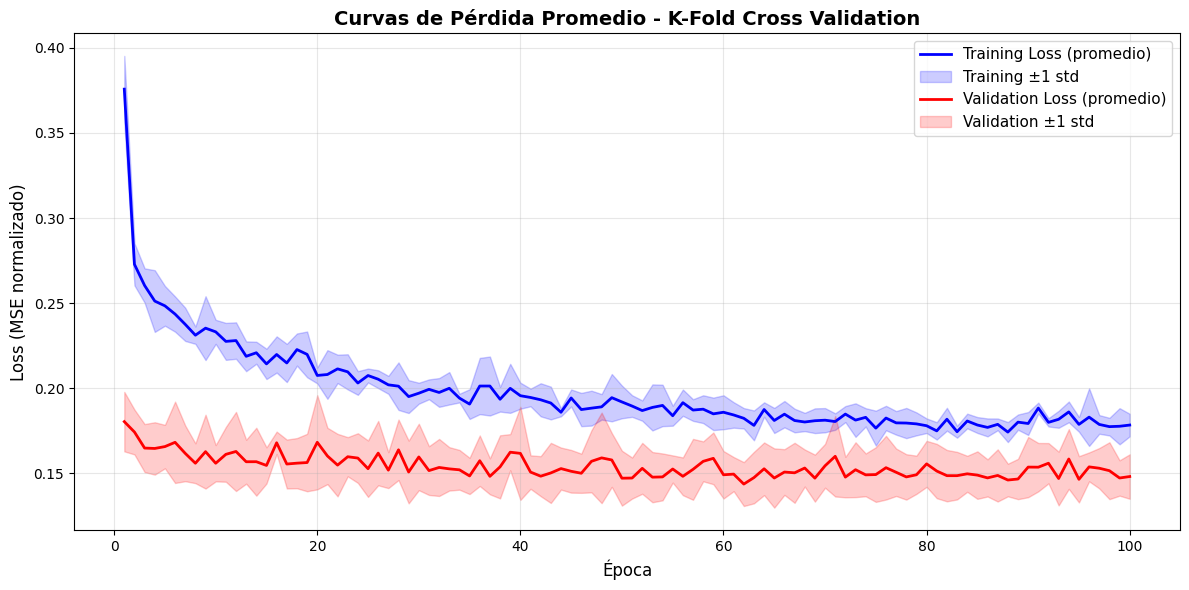

Pérdida final promedio - Training: 0.1783 (±0.0066)
Pérdida final promedio - Validation: 0.1481 (±0.0131)


In [42]:
plt.figure(figsize=(12, 6))

max_epochs = min(len(losses) for losses in cv_train_losses)
epochs = range(1, max_epochs + 1)

avg_train_losses = []
std_train_losses = []
avg_val_losses = []
std_val_losses = []

for epoch in range(max_epochs):
    train_epoch_losses = [losses[epoch] for losses in cv_train_losses if epoch < len(losses)]
    val_epoch_losses = [losses[epoch] for losses in cv_val_losses if epoch < len(losses)]
    
    avg_train_losses.append(np.mean(train_epoch_losses))
    std_train_losses.append(np.std(train_epoch_losses))
    avg_val_losses.append(np.mean(val_epoch_losses))
    std_val_losses.append(np.std(val_epoch_losses))

avg_train_losses = np.array(avg_train_losses)
std_train_losses = np.array(std_train_losses)
avg_val_losses = np.array(avg_val_losses)
std_val_losses = np.array(std_val_losses)

plt.plot(epochs, avg_train_losses, 'b-', label='Training Loss (promedio)', linewidth=2)
plt.fill_between(epochs, avg_train_losses - std_train_losses, avg_train_losses + std_train_losses, 
                 alpha=0.2, color='blue', label='Training ±1 std')
plt.plot(epochs, avg_val_losses, 'r-', label='Validation Loss (promedio)', linewidth=2)
plt.fill_between(epochs, avg_val_losses - std_val_losses, avg_val_losses + std_val_losses, 
                 alpha=0.2, color='red', label='Validation ±1 std')

plt.title('Curvas de Pérdida Promedio - K-Fold Cross Validation', fontsize=14, fontweight='bold')
plt.xlabel('Época', fontsize=12)
plt.ylabel('Loss (MSE normalizado)', fontsize=12)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"Pérdida final promedio - Training: {avg_train_losses[-1]:.4f} (±{std_train_losses[-1]:.4f})")
print(f"Pérdida final promedio - Validation: {avg_val_losses[-1]:.4f} (±{std_val_losses[-1]:.4f})")

In [43]:
import optuna
from optuna.visualization import plot_optimization_history, plot_param_importances
from sklearn.metrics import r2_score, mean_squared_error

def objective(trial):
    """
    Función objetivo para Optuna que define el espacio de búsqueda
    y entrena el modelo con cada configuración
    """
    
    # 1. HIPERPARÁMETROS DE ARQUITECTURA
    n_layers = trial.suggest_int('n_layers', 2, 4)
    
    layer_sizes = []
    prev_size = X_train_tensor.shape[1]
    
    for i in range(n_layers):
        if i == 0:
            size = trial.suggest_int(f'layer_{i}_size', 32, 256, step=32)
        else:
            max_size = max(prev_size // 2, 16)
            min_size = 16
            
            if max_size < min_size:
                size = trial.suggest_int(f'layer_{i}_size', 16, 32, step=16)
            else:
                size = trial.suggest_int(f'layer_{i}_size', min_size, max_size, step=16)
        
        layer_sizes.append(size)
        prev_size = size
    
    dropout_rates = [
        trial.suggest_float(f'dropout_{i}', 0.0, 0.5, step=0.1)
        for i in range(n_layers)
    ]
    
    use_batch_norm = trial.suggest_categorical('use_batch_norm', [True, False])
    
    # 2. HIPERPARÁMETROS DE ENTRENAMIENTO
    learning_rate = trial.suggest_float('learning_rate', 1e-4, 1e-2, log=True)
    weight_decay = trial.suggest_float('weight_decay', 1e-6, 1e-3, log=True)
    batch_size = trial.suggest_categorical('batch_size', [16, 32, 64, 128])
    
    # 3. SCHEDULER
    scheduler_patience = trial.suggest_int('scheduler_patience', 5, 20)
    scheduler_factor = trial.suggest_float('scheduler_factor', 0.3, 0.7, step=0.1)
    
    # 4. CONSTRUIR MODELO DINÁMICAMENTE
    class DynamicHousePriceNN(nn.Module):
        def __init__(self, n_features, layer_sizes, dropout_rates, use_batch_norm):
            super(DynamicHousePriceNN, self).__init__()
            
            layers = []
            input_size = n_features
            
            for i, (hidden_size, dropout) in enumerate(zip(layer_sizes, dropout_rates)):
                layers.append(nn.Linear(input_size, hidden_size))
                
                if use_batch_norm:
                    layers.append(nn.BatchNorm1d(hidden_size))
                
                layers.append(nn.ReLU())
                
                if dropout > 0:
                    layers.append(nn.Dropout(dropout))
                
                input_size = hidden_size
            
            layers.append(nn.Linear(input_size, 1))
            
            self.network = nn.Sequential(*layers)
        
        def forward(self, x):
            return self.network(x)
    
    # 5. CREAR MODELO, OPTIMIZADOR Y SCHEDULER
    model = DynamicHousePriceNN(
        X_train_tensor.shape[1], 
        layer_sizes, 
        dropout_rates, 
        use_batch_norm
    )
    
    criterion = nn.MSELoss()
    optimizer = optim.Adam(
        model.parameters(), 
        lr=learning_rate, 
        weight_decay=weight_decay
    )
    scheduler = optim.lr_scheduler.ReduceLROnPlateau(
        optimizer, 
        mode='min', 
        factor=scheduler_factor, 
        patience=scheduler_patience
    )
    
    # 6. DATALOADER
    train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    
    # 7. ENTRENAMIENTO (con early stopping)
    num_epochs = 100
    best_val_loss = float('inf')
    patience_counter = 0
    early_stop_patience = 15
    
    for epoch in range(num_epochs):
        model.train()
        train_loss = 0.0
        
        for batch_x, batch_y in train_loader:
            optimizer.zero_grad()
            outputs = model(batch_x).squeeze()
            loss = criterion(outputs, batch_y)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()
        
        model.eval()
        with torch.no_grad():
            val_outputs = model(X_test_tensor).squeeze()
            val_loss = criterion(val_outputs, y_test_tensor).item()
        
        scheduler.step(val_loss)
        
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            patience_counter = 0
        else:
            patience_counter += 1
            if patience_counter >= early_stop_patience:
                break
        
        trial.report(val_loss, epoch)
        
        if trial.should_prune():
            raise optuna.TrialPruned()
    
    # 8. EVALUAR EN ESCALA ORIGINAL CON TODAS LAS MÉTRICAS
    model.eval()
    with torch.no_grad():
        test_pred_scaled = model(X_test_tensor).squeeze().numpy()
        test_pred = scaler_y.inverse_transform(test_pred_scaled.reshape(-1, 1)).flatten()
    
    # Calcular todas las métricas
    test_mae = mean_absolute_error(y_test, test_pred)
    test_rmse = np.sqrt(mean_squared_error(y_test, test_pred))
    test_r2 = r2_score(y_test, test_pred)
    test_mape = np.mean(np.abs((y_test - test_pred) / y_test)) * 100
    test_mae_percent = (test_mae / y_test.mean()) * 100
    
    # Guardar métricas adicionales en user_attrs
    trial.set_user_attr('rmse', test_rmse)
    trial.set_user_attr('r2', test_r2)
    trial.set_user_attr('mape', test_mape)
    trial.set_user_attr('mae_percent', test_mae_percent)
    
    return test_mae

print("✅ Función objetivo con TODAS las métricas definida")

✅ Función objetivo con TODAS las métricas definida


In [44]:
warnings.filterwarnings('ignore', category=UserWarning, module='optuna')

study = optuna.create_study(
    direction='minimize',
    pruner=optuna.pruners.MedianPruner(n_warmup_steps=10),
    study_name='mlp_house_price_optimization'
)

optuna.logging.set_verbosity(optuna.logging.WARNING)

print("🚀 Iniciando optimización de hiperparámetros...")
print("Esto puede tardar varios minutos...\n")

with tqdm(total=50, desc="Optimización", unit="trial") as pbar:
    def callback(study, trial):
        pbar.set_postfix({
            'Mejor MAE': f'${study.best_value:,.0f}',
            'Trial': trial.number
        })
        pbar.update(1)
    
    study.optimize(
        objective,
        n_trials=50,
        callbacks=[callback],
        show_progress_bar=False
    )

print("\n✅ Optimización completada!")
print(f"🎯 Mejor MAE: ${study.best_value:,.0f}")

🚀 Iniciando optimización de hiperparámetros...
Esto puede tardar varios minutos...



Optimización: 100%|██████████| 50/50 [08:33<00:00, 10.27s/trial, Mejor MAE=$40,432,518, Trial=49]


✅ Optimización completada!
🎯 Mejor MAE: $40,432,518


In [45]:
print("=" * 70)
print("MEJOR MODELO - MÉTRICAS COMPLETAS")
print("=" * 70)

best_trial = study.best_trial

print("\n📊 Hiperparámetros óptimos:")
for param, value in best_trial.params.items():
    print(f"  • {param}: {value}")

print("\n📈 Métricas de rendimiento (escala original):")
print(f"  • MAE:         ${best_trial.value:,.0f}")
print(f"  • MAE%:        {best_trial.user_attrs['mae_percent']:.2f}%")
print(f"  • RMSE:        ${best_trial.user_attrs['rmse']:,.0f}")
print(f"  • R²:          {best_trial.user_attrs['r2']:.4f}")
print(f"  • MAPE:        {best_trial.user_attrs['mape']:.2f}%")

print(f"\n🔢 Estadísticas de optimización:")
print(f"  • Trials totales:     {len(study.trials)}")
print(f"  • Trials completados: {len([t for t in study.trials if t.state == optuna.trial.TrialState.COMPLETE])}")
print(f"  • Trials podados:     {len([t for t in study.trials if t.state == optuna.trial.TrialState.PRUNED])}")

MEJOR MODELO - MÉTRICAS COMPLETAS

📊 Hiperparámetros óptimos:
  • n_layers: 2
  • layer_0_size: 160
  • layer_1_size: 64
  • dropout_0: 0.30000000000000004
  • dropout_1: 0.0
  • use_batch_norm: False
  • learning_rate: 0.00179103543632162
  • weight_decay: 4.973471681549944e-05
  • batch_size: 64
  • scheduler_patience: 5
  • scheduler_factor: 0.6000000000000001

📈 Métricas de rendimiento (escala original):
  • MAE:         $40,432,518
  • MAE%:        17.77%
  • RMSE:        $63,908,794
  • R²:          0.8618
  • MAPE:        21.37%

🔢 Estadísticas de optimización:
  • Trials totales:     50
  • Trials completados: 27
  • Trials podados:     23
